In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wc11111/heart_statlog_cleveland_hungary_final.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from tqdm import tqdm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score, roc_curve



from matplotlib import rcParams
from matplotlib.cm import rainbow

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

# Assuming your dataset is in '/kaggle/input/wc11111/heart_statlog_cleveland_hungary_final.csv'
file_path = '/kaggle/input/wc11111/heart_statlog_cleveland_hungary_final.csv'
df = pd.read_csv(file_path)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [5]:
df.shape

(1190, 12)

In [6]:
print(df.columns)

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')


In [7]:
df = df.drop('resting ecg', axis=1)

In [8]:
df.to_csv('modified_dataset.csv', index=False)

In [9]:
df1 = pd.read_csv('/kaggle/working/modified_dataset.csv')

In [10]:
df.shape

(1190, 11)

In [11]:
df["target"].value_counts()

target
1    629
0    561
Name: count, dtype: int64

In [12]:
Y = df['target']
X = df.drop(['target'], axis = 1)

In [13]:
np.random.seed(49)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [14]:
accuracy = {}

In [15]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

train_score_knn_before = accuracy_score(y_train, knn.predict(X_train)) * 100
test_score_knn_before = accuracy_score(y_test, knn.predict(X_test)) * 100

accuracy['KNN'] = test_score_knn_before
print("K-nearest neighbors:")
print("Training Accuracy: {:.2f}%".format(train_score_knn_before))
print("Testing Accuracy: {:.2f}%".format(test_score_knn_before))
print("\n")

results_df_knn = pd.DataFrame(data=[["K-nearest neighbors", train_score_knn_before, test_score_knn_before]],
                               columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

K-nearest neighbors:
Training Accuracy: 77.63%
Testing Accuracy: 69.75%




In [16]:
svm = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm.fit(X_train, y_train)

train_score_svm_before = accuracy_score(y_train, svm.predict(X_train)) * 100
test_score_svm_before = accuracy_score(y_test, svm.predict(X_test)) * 100

accuracy['SVM'] = test_score_svm_before

print("Support Vector Machine:")
print("Training Accuracy: {:.2f}%".format(train_score_svm_before))
print("Testing Accuracy: {:.2f}%".format(test_score_svm_before))
print("\n")

results_df_svm = pd.DataFrame(data=[["Support Vector Machine", train_score_svm_before, test_score_svm_before]],
                               columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

Support Vector Machine:
Training Accuracy: 100.00%
Testing Accuracy: 74.37%




In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Create an instance of the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Fit the model to the training data
dt_classifier.fit(X_train, y_train)

# Calculate accuracy scores
train_score_dt_before = accuracy_score(y_train, dt_classifier.predict(X_train)) * 100
test_score_dt_before = accuracy_score(y_test, dt_classifier.predict(X_test)) * 100

# Print Decision Tree Classifier results
print("Decision Tree Classifier:")
print("Training Accuracy: {:.2f}%".format(train_score_dt_before))
print("Testing Accuracy: {:.2f}%".format(test_score_dt_before))
print("\n")

# Store results in a DataFrame
results_df_dt = pd.DataFrame(data=[["Decision Tree Classifier", train_score_dt_before, test_score_dt_before]],
                              columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

Decision Tree Classifier:
Training Accuracy: 100.00%
Testing Accuracy: 86.13%




In [18]:
df = pd.read_csv('/kaggle/input/wc11111/heart_statlog_cleveland_hungary_final.csv')

In [19]:
df = df.sample(frac=1, random_state=52)

In [20]:
df["target"].value_counts()

target
1    629
0    561
Name: count, dtype: int64

In [21]:
Y = df['target']
X = df.drop(['target'], axis = 1)

In [22]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [23]:
accuracy = {}

In [24]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

train_score_knn_after = accuracy_score(y_train, knn.predict(X_train)) * 100
test_score_knn_after = accuracy_score(y_test, knn.predict(X_test)) * 100

accuracy['KNN'] = test_score_knn_after
print("K-nearest neighbors:")
print("Training Accuracy: {:.2f}%".format(train_score_knn_after))
print("Testing Accuracy: {:.2f}%".format(test_score_knn_after))
print("\n")

results_df_knn = pd.DataFrame(data=[["K-nearest neighbors", train_score_knn_after, test_score_knn_after]],
                               columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

K-nearest neighbors:
Training Accuracy: 79.10%
Testing Accuracy: 70.59%




In [25]:
svm = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm.fit(X_train, y_train)

train_score_svm_after = accuracy_score(y_train, svm.predict(X_train)) * 100
test_score_svm_after = accuracy_score(y_test, svm.predict(X_test)) * 100

accuracy['SVM'] = test_score_svm_after

print("Support Vector Machine:")
print("Training Accuracy: {:.2f}%".format(train_score_svm_after))
print("Testing Accuracy: {:.2f}%".format(test_score_svm_after))
print("\n")

results_df_svm = pd.DataFrame(data=[["Support Vector Machine", train_score_svm_after, test_score_svm_after]],
                               columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

Support Vector Machine:
Training Accuracy: 100.00%
Testing Accuracy: 78.57%




In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Use the DecisionTreeClassifier class directly
dt_classifier = DecisionTreeClassifier()

# Fit the model to the training data
dt_classifier.fit(X_train, y_train)

# Calculate accuracy scores
train_score_dt_after = accuracy_score(y_train, dt_classifier.predict(X_train)) * 100
test_score_dt_after = accuracy_score(y_test, dt_classifier.predict(X_test)) * 100

# Print Decision Tree Classifier results
print("Decision Tree Classifier:")
print("Training Accuracy: {:.2f}%".format(train_score_dt_after))
print("Testing Accuracy: {:.2f}%".format(test_score_dt_after))
print("\n")

# Store results in a DataFrame
results_df_dt = pd.DataFrame(data=[["Decision Tree Classifier", train_score_dt_after, test_score_dt_after]],
                              columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])


Decision Tree Classifier:
Training Accuracy: 100.00%
Testing Accuracy: 91.18%




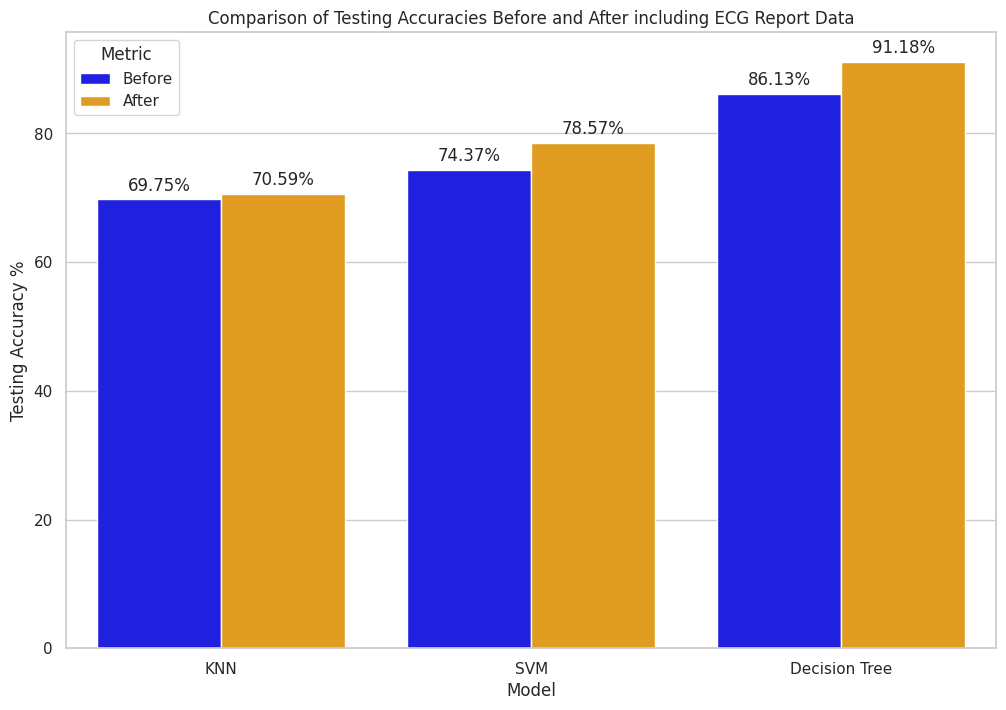

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Your data
models = ['KNN', 'SVM', 'Decision Tree']
accuracy_before = [test_score_knn_before, test_score_svm_before, test_score_dt_before]
accuracy_after = [test_score_knn_after, test_score_svm_after, test_score_dt_after]

visualization_df = pd.DataFrame(data={
    'Model': models,
    'Before': accuracy_before,
    'After': accuracy_after
})

# Set the style
sns.set(style="whitegrid")

# Melt the DataFrame to have a 'Metric' column for "Before" and "After"
visualization_df_melted = pd.melt(visualization_df, id_vars=['Model'], var_name='Metric', value_name='Accuracy')

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))

# Plotting the data
ax = sns.barplot(x='Model', y='Accuracy', hue='Metric', data=visualization_df_melted, palette=['blue', 'orange'])

# Adding labels above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Testing Accuracy %')
plt.title('Comparison of Testing Accuracies Before and After including ECG Report Data')

# Show the plot
plt.legend(title='Metric')
plt.show()


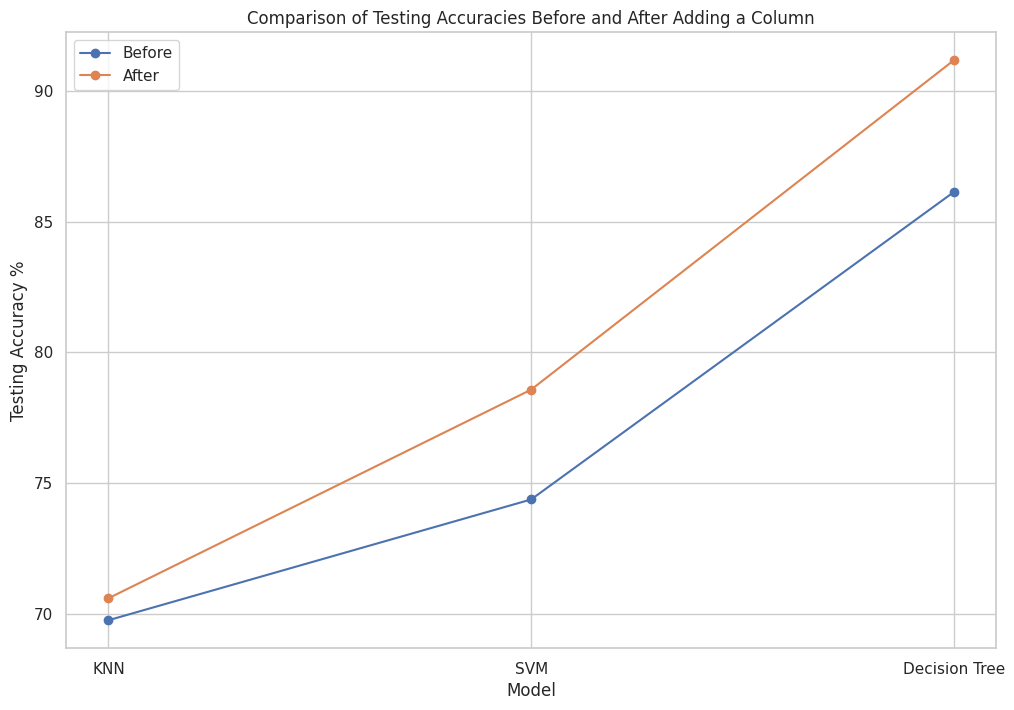

In [28]:
models = ['KNN', 'SVM', 'Decision Tree']
accuracy_before = [test_score_knn_before, test_score_svm_before, test_score_dt_before]
accuracy_after = [test_score_knn_after, test_score_svm_after, test_score_dt_after]

visualization_df = pd.DataFrame(data={
    'Model': models,
    'Before': accuracy_before,
    'After': accuracy_after
})

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

plt.plot(models, accuracy_before, marker='o', label='Before')
plt.plot(models, accuracy_after, marker='o', label='After')

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Testing Accuracy %')
plt.title('Comparison of Testing Accuracies Before and After Adding a Column')
plt.legend()

# Show the plot
plt.show()


In [29]:
df = pd.read_csv('/kaggle/input/wc11111/heart_statlog_cleveland_hungary_final.csv')
df = df.sample(frac=1, random_state=52)
df["target"].value_counts()
Y = df['target']
X = df.drop(['target'], axis = 1)
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [30]:
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

In [31]:
X_array = X.values

In [32]:
knn_classifier = KNeighborsClassifier()
svm_classifier = SVC()
dt_classifier = DecisionTreeClassifier()

In [33]:
accuracies = {'KNN': [], 'SVM': [], 'Decision Tree': []}

Fold 1 - KNN Accuracy: 0.46218487394957986, SVM Accuracy: 0.5882352941176471, DT Accuracy: 0.4495798319327731
Fold 2 - KNN Accuracy: 0.542016806722689, SVM Accuracy: 0.5042016806722689, DT Accuracy: 0.5546218487394958
Fold 3 - KNN Accuracy: 0.5546218487394958, SVM Accuracy: 0.5462184873949579, DT Accuracy: 0.542016806722689
Fold 4 - KNN Accuracy: 0.5210084033613446, SVM Accuracy: 0.5336134453781513, DT Accuracy: 0.5336134453781513
Fold 5 - KNN Accuracy: 0.4789915966386555, SVM Accuracy: 0.5042016806722689, DT Accuracy: 0.5462184873949579


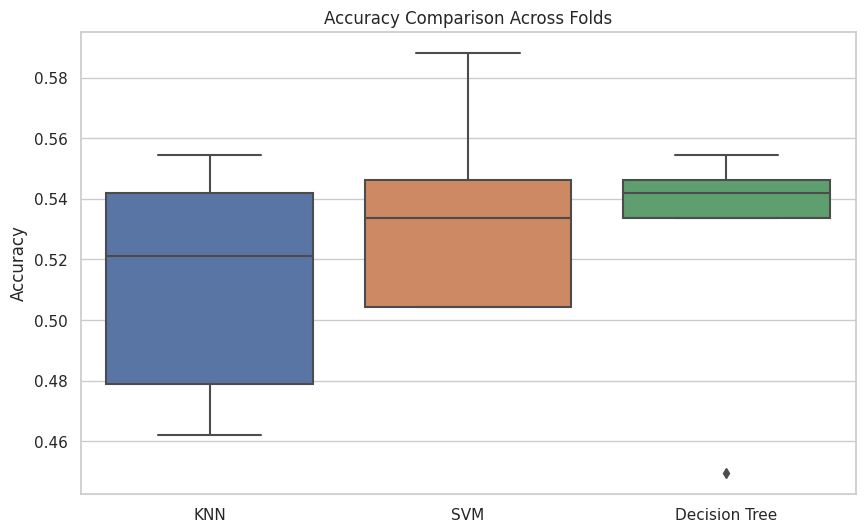

In [34]:
knn_classifier = KNeighborsClassifier()
svm_classifier = SVC()
dt_classifier = DecisionTreeClassifier()

# Create KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a dictionary to store accuracies
accuracies = {'KNN': [], 'SVM': [], 'Decision Tree': []}

# Loop through folds
for fold, (train_index, test_index) in enumerate(kf.split(X_array), 1):
    X_train, X_test = X_array[train_index], X_array[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    # K-Nearest Neighbors
    knn_classifier.fit(X_train, Y_train)
    knn_predictions = knn_classifier.predict(X_test)
    knn_accuracy = accuracy_score(Y_test, knn_predictions)
    accuracies['KNN'].append(knn_accuracy)

    # Support Vector Machine
    svm_classifier.fit(X_train, Y_train)
    svm_predictions = svm_classifier.predict(X_test)
    svm_accuracy = accuracy_score(Y_test, svm_predictions)
    accuracies['SVM'].append(svm_accuracy)

    # Decision Tree
    dt_classifier.fit(X_train, Y_train)
    dt_predictions = dt_classifier.predict(X_test)
    dt_accuracy = accuracy_score(Y_test, dt_predictions)
    accuracies['Decision Tree'].append(dt_accuracy)

    print(f'Fold {fold} - KNN Accuracy: {knn_accuracy}, SVM Accuracy: {svm_accuracy}, DT Accuracy: {dt_accuracy}')

# Create a DataFrame from the accuracies dictionary
df_accuracies = pd.DataFrame(accuracies)

# Plot box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_accuracies)
plt.title('Accuracy Comparison Across Folds')
plt.ylabel('Accuracy')
plt.show()

In [35]:
df = pd.read_csv('/kaggle/input/wc11111/heart_statlog_cleveland_hungary_final.csv')
df = df.sample(frac=1, random_state=52)
df["target"].value_counts()
Y = df['target']
X = df.drop(['target'], axis = 1)
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [37]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [38]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [39]:
knn_classifier = KNeighborsClassifier()
svm_classifier = SVC(probability=True)  # Note: Set probability=True for soft voting
dt_classifier = DecisionTreeClassifier()

# Create a Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[('knn', knn_classifier), ('svm', svm_classifier), ('dt', dt_classifier)],
    voting='soft'  # Use 'hard' for hard voting, 'soft' for soft voting
)

# Define the k-fold cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the ensemble using cross-validation
ensemble_accuracy = cross_val_score(voting_classifier, X_scaled, Y, cv=kf, scoring='accuracy')
average_accuracy = ensemble_accuracy.mean()

print(f'Ensemble (Voting Classifier) Average Accuracy: {average_accuracy}')


Ensemble (Voting Classifier) Average Accuracy: 0.9159663865546218


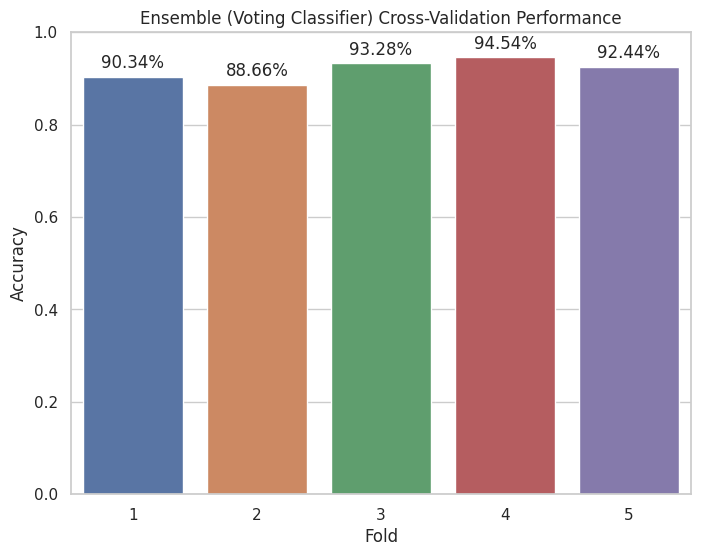

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler

# Assuming you have X and Y defined

# Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create individual classifiers
knn_classifier = KNeighborsClassifier()
svm_classifier = SVC(probability=True)  # Note: Set probability=True for soft voting
dt_classifier = DecisionTreeClassifier()

# Create a Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[('knn', knn_classifier), ('svm', svm_classifier), ('dt', dt_classifier)],
    voting='soft'  # Use 'hard' for hard voting, 'soft' for soft voting
)

# Define the k-fold cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the ensemble using cross-validation
ensemble_accuracy = cross_val_score(voting_classifier, X_scaled, Y, cv=kf, scoring='accuracy')

# Plotting
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=list(range(1, 6)), y=ensemble_accuracy)

# Adding values above the bars
for p, value in zip(ax.patches, ensemble_accuracy):
    ax.annotate(f'{value * 100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Ensemble (Voting Classifier) Cross-Validation Performance')
plt.ylim(0, 1)  # Set the y-axis limit to the range of accuracy values (0 to 1)
plt.show()


In [41]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

# Assuming you have X_array_scaled, Y, and kf defined

# Define the individual classifiers
knn_classifier = KNeighborsClassifier()
rf_classifier = RandomForestClassifier()
svm_classifier = SVC()
dt_classifier = DecisionTreeClassifier()

# Create a BaggingClassifier for each base model
knn_bagging = BaggingClassifier(base_estimator=knn_classifier, n_estimators=10, random_state=42)
rf_bagging = BaggingClassifier(base_estimator=rf_classifier, n_estimators=10, random_state=42)
svm_bagging = BaggingClassifier(base_estimator=svm_classifier, n_estimators=10, random_state=42)
dt_bagging = BaggingClassifier(base_estimator=dt_classifier, n_estimators=10, random_state=42)

classifiers = {'KNN Bagging': knn_bagging, 'Random Forest Bagging': rf_bagging,
               'SVM Bagging': svm_bagging, 'Decision Tree Bagging': dt_bagging}

# Evaluate each BaggingClassifier using cross-validation
for clf_name, clf in classifiers.items():
    scores = cross_val_score(clf, X_scaled, Y, cv=kf, scoring='accuracy')
    avg_score = np.mean(scores)
    print(f'{clf_name} - Average Accuracy: {avg_score}')


KNN Bagging - Average Accuracy: 0.8705882352941178
Random Forest Bagging - Average Accuracy: 0.926890756302521
SVM Bagging - Average Accuracy: 0.8714285714285716
Decision Tree Bagging - Average Accuracy: 0.9092436974789916


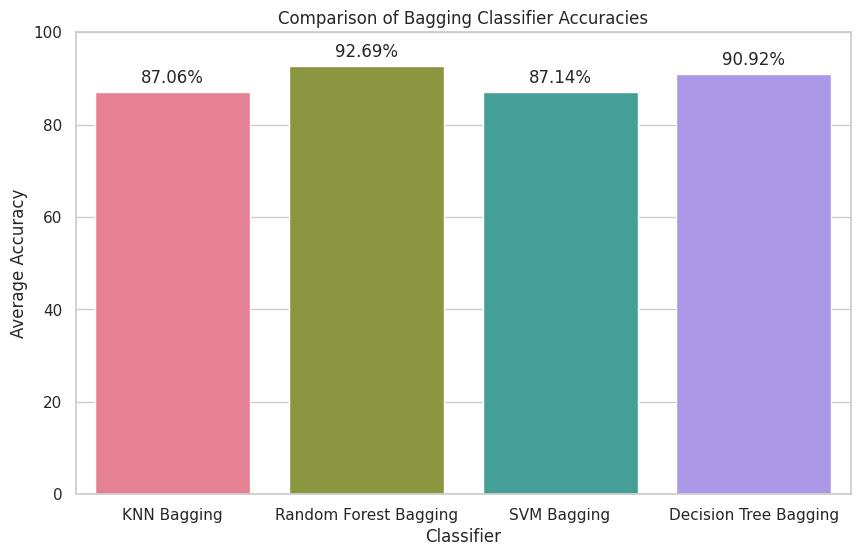

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Assuming you have X_scaled, Y, and kf defined

# Define the individual classifiers
knn_classifier = KNeighborsClassifier()
rf_classifier = RandomForestClassifier()
svm_classifier = SVC()
dt_classifier = DecisionTreeClassifier()

# Create a BaggingClassifier for each base model
knn_bagging = BaggingClassifier(base_estimator=knn_classifier, n_estimators=10, random_state=42)
rf_bagging = BaggingClassifier(base_estimator=rf_classifier, n_estimators=10, random_state=42)
svm_bagging = BaggingClassifier(base_estimator=svm_classifier, n_estimators=10, random_state=42)
dt_bagging = BaggingClassifier(base_estimator=dt_classifier, n_estimators=10, random_state=42)

classifiers = {'KNN Bagging': knn_bagging, 'Random Forest Bagging': rf_bagging,
               'SVM Bagging': svm_bagging, 'Decision Tree Bagging': dt_bagging}

# Dictionary to store results
results = {'Classifier': [], 'Average Accuracy': []}

# Evaluate each BaggingClassifier using cross-validation
for clf_name, clf in classifiers.items():
    scores = cross_val_score(clf, X_scaled, Y, cv=kf, scoring='accuracy')
    avg_score = np.mean(scores) * 100  # Scale to 0-100
    
    # Store results
    results['Classifier'].append(clf_name)
    results['Average Accuracy'].append(avg_score)

# Create a DataFrame for visualization
results_df = pd.DataFrame(results)

# Define a custom color palette
custom_palette = sns.color_palette("husl", len(classifiers))

# Plotting using seaborn with the custom color palette
plt.figure(figsize=(10, 6))
sns.barplot(x='Classifier', y='Average Accuracy', data=results_df, palette=custom_palette)
plt.title('Comparison of Bagging Classifier Accuracies')
plt.ylim(0, 100)  # Set y-axis limit to 100 for accuracy percentage
plt.ylabel('Average Accuracy')

# Adding values above the bars
for p, value in zip(plt.gca().patches, results_df['Average Accuracy']):
    plt.gca().annotate(f'{value:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


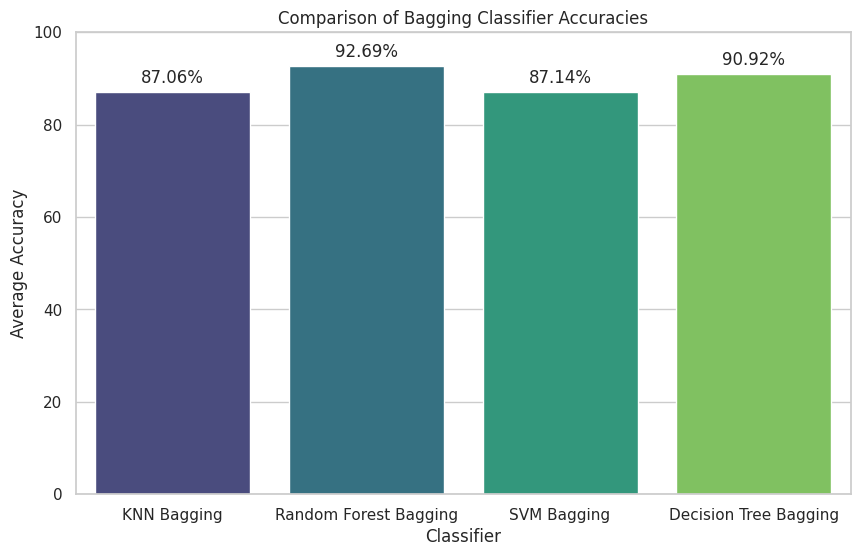

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Assuming you have X_scaled, Y, kf, and classifiers defined

# Dictionary to store results
results = {'Classifier': [], 'Average Accuracy': []}

# Evaluate each BaggingClassifier using cross-validation
for clf_name, clf in classifiers.items():
    scores = cross_val_score(clf, X_scaled, Y, cv=kf, scoring='accuracy')
    avg_score = np.mean(scores) * 100  # Scale to 0-100
    
    # Store results
    results['Classifier'].append(clf_name)
    results['Average Accuracy'].append(avg_score)

# Create a DataFrame for visualization
results_df = pd.DataFrame(results)

# Plotting using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Classifier', y='Average Accuracy', data=results_df, palette='viridis')
plt.title('Comparison of Bagging Classifier Accuracies')
plt.ylim(0, 100)  # Set y-axis limit to 100 for accuracy percentage
plt.ylabel('Average Accuracy')

# Adding values above the bars
for p, value in zip(ax.patches, results_df['Average Accuracy']):
    ax.annotate(f'{value:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)

train_score_rf = accuracy_score(y_train, rf.predict(X_train)) * 100
test_score_rf = accuracy_score(y_test, rf.predict(X_test)) * 100

print("Random Forest Classifier:")
print("Training Accuracy: {:.2f}%".format(train_score_rf))
print("Testing Accuracy: {:.2f}%".format(test_score_rf))
print("\n")

accuracy = {'Random Forest Classifier': test_score_rf}

Random Forest Classifier:
Training Accuracy: 100.00%
Testing Accuracy: 92.86%




In [45]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import seaborn as sns
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.decomposition import PCA
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# # Assuming you have X, y, X_train, X_test, y_train, y_test, X_train_pca, X_test_pca, Y_train_pca, Y_test_pca, and y_test defined

# # Train classifiers after PCA
# knn_after = KNeighborsClassifier()
# knn_after.fit(X_train_pca, Y_train_pca)
# knn_after_score = knn_after.score(X_test_pca, Y_test_pca) * 100

# svm_after = SVC()
# svm_after.fit(X_train_pca, Y_train_pca)
# svm_after_score = svm_after.score(X_test_pca, Y_test_pca) * 100

# dt_after = DecisionTreeClassifier()
# dt_after.fit(X_train_pca, Y_train_pca)
# dt_after_score = dt_after.score(X_test_pca, Y_test_pca) * 100

# # Random Forest Classifier
# rf = RandomForestClassifier(n_estimators=1000, random_state=42)
# rf.fit(X_train, y_train)
# test_score_rf = accuracy_score(y_test, rf.predict(X_test)) * 100

# # Create a DataFrame for the accuracies
# data = {
#     'Classifier': ['KNN', 'SVM', 'Decision Tree', 'Random Forest'],
#     'Testing Accuracy': [knn_after_score, svm_after_score, dt_after_score, test_score_rf]
# }
# accuracy_df = pd.DataFrame(data)

# # Plotting with Seaborn for better styling
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Classifier', y='Testing Accuracy', data=accuracy_df, palette='viridis')
# plt.xlabel('Classifier')
# plt.ylabel('Testing Accuracy %')
# plt.title('Classifier Comparison on Testing Data')

# # Adding values above the bars
# for p, value in zip(plt.gca().patches, accuracy_df['Testing Accuracy']):
#     plt.gca().annotate(f'{value:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
#                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# plt.ylim(0, 100)  # Set the y-axis limit to the range of accuracy values (0 to 100)
# plt.show()

In [46]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Assuming you have X_array_scaled, Y, and kf defined

# Define the individual classifiers
knn_classifier = KNeighborsClassifier()
rf_classifier = RandomForestClassifier()
svm_classifier = SVC(probability=True)  # Note: Set probability=True for soft voting
dt_classifier = DecisionTreeClassifier()

# Create a Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[('knn', knn_classifier), ('rf', rf_classifier), ('svm', svm_classifier), ('dt', dt_classifier)],
    voting='soft'  # Use 'hard' for hard voting, 'soft' for soft voting
)

# Evaluate the ensemble using cross-validation
ensemble_accuracy = cross_val_score(voting_classifier, X_scaled, Y, cv=kf, scoring='accuracy')
average_accuracy = ensemble_accuracy.mean() * 100

print(f'Ensemble (Voting Classifier) Average Accuracy: {average_accuracy}')

Ensemble (Voting Classifier) Average Accuracy: 92.52100840336135


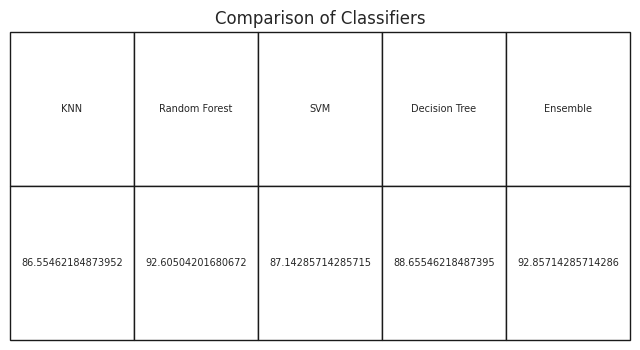

In [47]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# Assuming you have X_scaled, Y, kf, and classifiers defined

# Define the individual classifiers
knn_classifier = KNeighborsClassifier()
rf_classifier = RandomForestClassifier()
svm_classifier = SVC(probability=True)  # Note: Set probability=True for soft voting
dt_classifier = DecisionTreeClassifier()

# Create a Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[('knn', knn_classifier), ('rf', rf_classifier), ('svm', svm_classifier), ('dt', dt_classifier)],
    voting='soft'  # Use 'hard' for hard voting, 'soft' for soft voting
)

# Define the k-fold cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the individual classifiers and the ensemble using cross-validation
classifiers = {'KNN': knn_classifier, 'Random Forest': rf_classifier, 'SVM': svm_classifier, 'Decision Tree': dt_classifier, 'Ensemble': voting_classifier}

results = {'Classifier': [], 'Average Accuracy': []}

for clf_name, clf in classifiers.items():
    scores = cross_val_score(clf, X_scaled, Y, cv=kf, scoring='accuracy')
    avg_score = np.mean(scores) * 100  # Scale to 0-100
    
    # Store results
    results['Classifier'].append(clf_name)
    results['Average Accuracy'].append(avg_score)

# Plotting the table
plt.figure(figsize=(8, 4))
plt.table(cellText=[results['Average Accuracy']],
          colLabels=results['Classifier'],
          cellLoc='center',
          loc='center',
          bbox=[0, 0, 1, 1])

plt.axis('off')
plt.title('Comparison of Classifiers')
plt.show()

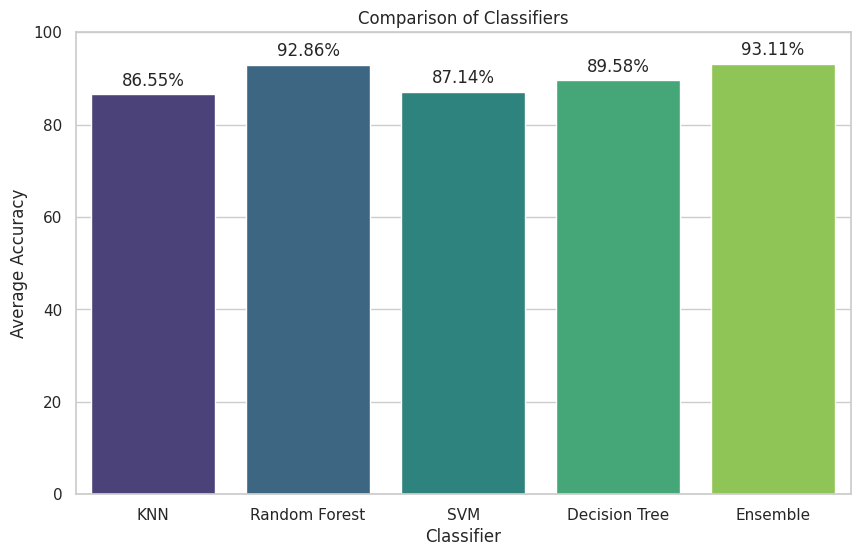

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# Assuming you have X_scaled, Y, kf, and classifiers defined

# Define the individual classifiers
knn_classifier = KNeighborsClassifier()
rf_classifier = RandomForestClassifier()
svm_classifier = SVC(probability=True)  # Note: Set probability=True for soft voting
dt_classifier = DecisionTreeClassifier()

# Create a Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[('knn', knn_classifier), ('rf', rf_classifier), ('svm', svm_classifier), ('dt', dt_classifier)],
    voting='soft'  # Use 'hard' for hard voting, 'soft' for soft voting
)

# Define the k-fold cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the individual classifiers and the ensemble using cross-validation
classifiers = {'KNN': knn_classifier, 'Random Forest': rf_classifier, 'SVM': svm_classifier, 'Decision Tree': dt_classifier, 'Ensemble': voting_classifier}

results = {'Classifier': [], 'Average Accuracy': []}

for clf_name, clf in classifiers.items():
    scores = cross_val_score(clf, X_scaled, Y, cv=kf, scoring='accuracy')
    avg_score = np.mean(scores) * 100  # Scale to 0-100
    
    # Store results
    results['Classifier'].append(clf_name)
    results['Average Accuracy'].append(avg_score)

# Create a DataFrame for visualization
results_df = pd.DataFrame(results)

# Plotting using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Classifier', y='Average Accuracy', data=results_df, palette='viridis')
plt.title('Comparison of Classifiers')
plt.ylim(0, 100)  # Set y-axis limit to 100 for accuracy percentage
plt.ylabel('Average Accuracy')

# Adding values above the bars
for p, value in zip(plt.gca().patches, results_df['Average Accuracy']):
    plt.gca().annotate(f'{value:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

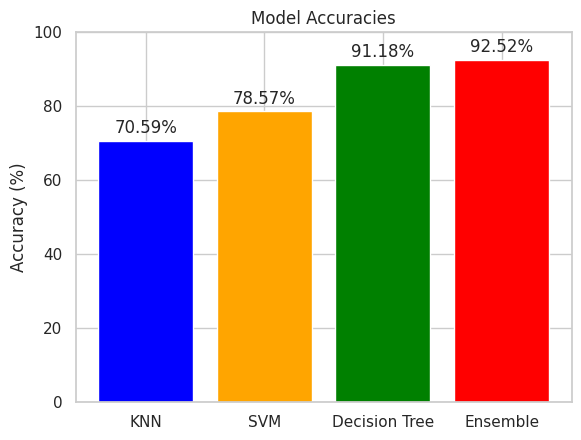

In [49]:
import matplotlib.pyplot as plt

# Assuming you have the accuracy dictionary defined
accuracy = {
    'KNN': test_score_knn_after,
    'SVM': test_score_svm_after,
    'Decision Tree': test_score_dt_after,
    'Ensemble': average_accuracy
}

# Plotting the bar chart
fig, ax = plt.subplots()
models = list(accuracy.keys())
scores = list(accuracy.values())

ax.bar(models, scores, color=['blue', 'orange', 'green', 'red'])
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Accuracies')
ax.set_ylim(0, 100)

# Adding the accuracy values on top of the bars
for i, v in enumerate(scores):
    ax.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

# Display the bar chart
plt.show()

In [50]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train, y_train)
accuracy['XGBoost'] = accuracy_score(y_test, xgb.predict(X_test)) * 100

print("XGBoost:")
print(f"Testing Accuracy: {accuracy['XGBoost']:.2f}%")

XGBoost:
Testing Accuracy: 92.44%


In [51]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

adaboost = AdaBoostClassifier(base_classifier, n_estimators=30, learning_rate=0.05, random_state=42)
adaboost.fit(X_train, y_train)
accuracy['AdaBoost'] = accuracy_score(y_test, adaboost.predict(X_test)) * 100

print("AdaBoost:")
print(f"Testing Accuracy: {accuracy['AdaBoost']:.2f}%")

AdaBoost:
Testing Accuracy: 86.13%


In [52]:
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(iterations=100, depth=10, learning_rate=0.05, loss_function='Logloss', random_seed=42)

catboost.fit(X_train, y_train)
accuracy['CatBoost'] = accuracy_score(y_test, catboost.predict(X_test)) * 100

print("CatBoost:")
print(f"Testing Accuracy: {accuracy['CatBoost']:.2f}%")

0:	learn: 0.6791174	total: 60.3ms	remaining: 5.97s
1:	learn: 0.6595506	total: 61.7ms	remaining: 3.02s
2:	learn: 0.6391738	total: 62.5ms	remaining: 2.02s
3:	learn: 0.6274261	total: 67.8ms	remaining: 1.63s
4:	learn: 0.6137883	total: 72.8ms	remaining: 1.38s
5:	learn: 0.6037250	total: 78ms	remaining: 1.22s
6:	learn: 0.5897233	total: 78.6ms	remaining: 1.04s
7:	learn: 0.5805855	total: 82.8ms	remaining: 953ms
8:	learn: 0.5708655	total: 87.4ms	remaining: 883ms
9:	learn: 0.5613300	total: 87.6ms	remaining: 788ms
10:	learn: 0.5506910	total: 91ms	remaining: 736ms
11:	learn: 0.5414961	total: 95.3ms	remaining: 699ms
12:	learn: 0.5325224	total: 99.1ms	remaining: 663ms
13:	learn: 0.5234682	total: 102ms	remaining: 628ms
14:	learn: 0.5159466	total: 106ms	remaining: 602ms
15:	learn: 0.5087613	total: 110ms	remaining: 579ms
16:	learn: 0.5021508	total: 114ms	remaining: 558ms
17:	learn: 0.4963430	total: 118ms	remaining: 538ms
18:	learn: 0.4881483	total: 123ms	remaining: 522ms
19:	learn: 0.4814147	total: 126m

In [53]:
import pandas as pd

# Assuming you have the accuracy dictionary defined
accuracy = {
    'Voting Classifier': average_accuracy,
    'XGBoost': accuracy['XGBoost'],
    'AdaBoost': accuracy['AdaBoost'],
    'CatBoost': accuracy['CatBoost']
}

# Create a DataFrame from the accuracy dictionary
accuracy_df = pd.DataFrame(list(accuracy.items()), columns=['Model', 'Testing Accuracy'])

# Display the accuracy table
print(accuracy_df)

               Model  Testing Accuracy
0  Voting Classifier         92.521008
1            XGBoost         92.436975
2           AdaBoost         86.134454
3           CatBoost         89.075630


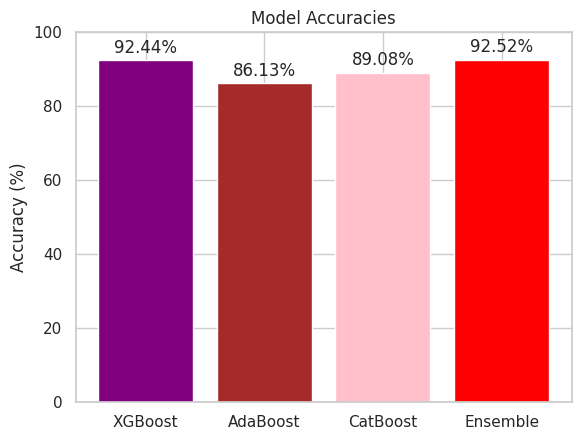

In [54]:
import matplotlib.pyplot as plt

# Accuracy for the new models
accuracy = {
    'XGBoost': accuracy_score(y_test, xgb.predict(X_test)) * 100,
    'AdaBoost': accuracy_score(y_test, adaboost.predict(X_test)) * 100,
    'CatBoost': accuracy_score(y_test, catboost.predict(X_test)) * 100,
    'Ensemble': average_accuracy
}

# Plotting the bar chart
fig, ax = plt.subplots()
models = list(accuracy.keys())
scores = list(accuracy.values())

ax.bar(models, scores, color=['purple', 'brown', 'pink', 'red'])
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Accuracies')
ax.set_ylim(0, 100)

# Adding the accuracy values on top of the bars
for i, v in enumerate(scores):
    ax.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

# Display the bar chart
plt.show()


In [55]:
import seaborn as sns

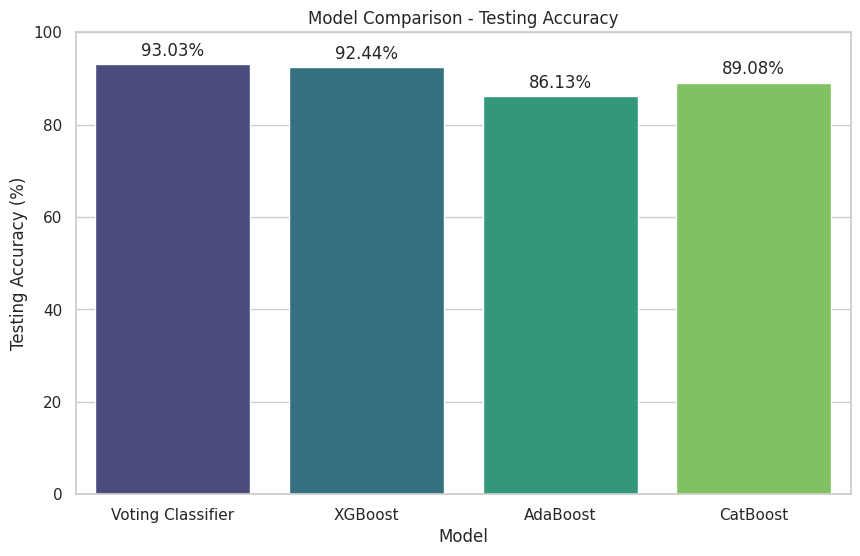

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy values
accuracy_data = {
    'Model': ['Voting Classifier', 'XGBoost', 'AdaBoost', 'CatBoost'],
    'Testing Accuracy': [93.025210, 92.436975, 86.134454, 89.075630]
}

# Create a DataFrame from the accuracy dictionary
accuracy_df = pd.DataFrame(accuracy_data)

# Plotting the bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Testing Accuracy', data=accuracy_df, palette='viridis')
plt.title('Model Comparison - Testing Accuracy')
plt.ylabel('Testing Accuracy (%)')
plt.ylim(0, 100)  # Set the y-axis limit between 0 and 100 for percentage values

# Display the percentage values on top of the bars
for index, value in enumerate(accuracy_df['Testing Accuracy']):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom')

plt.show()


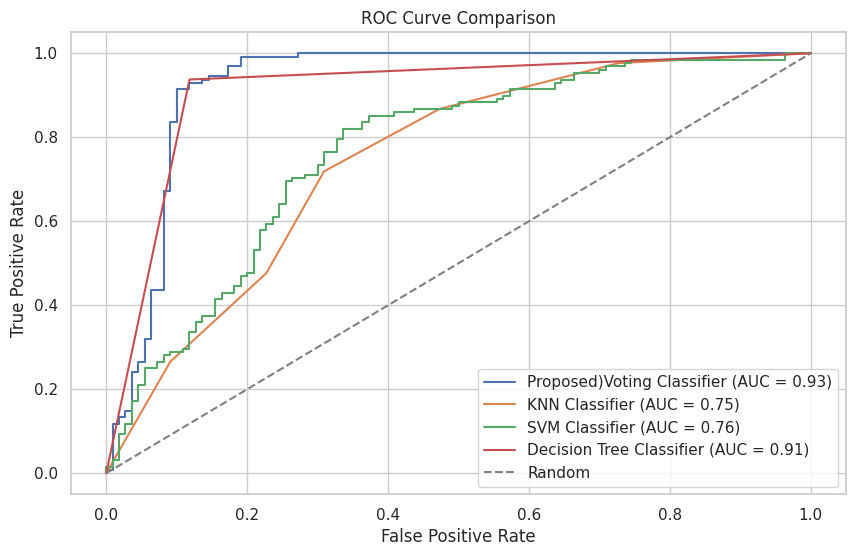

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have X, Y, and the models defined (e.g., voting_classifier, knn_classifier, svm_classifier, dt_classifier)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the models
voting_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)

# Get predicted probabilities for each model
voting_probs = voting_classifier.predict_proba(X_test)[:, 1]
knn_probs = knn_classifier.predict_proba(X_test)[:, 1]
svm_probs = svm_classifier.predict_proba(X_test)[:, 1]
dt_probs = dt_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for each model
voting_fpr, voting_tpr, _ = roc_curve(y_test, voting_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

voting_auc = roc_auc_score(y_test, voting_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(voting_fpr, voting_tpr, label=f'Proposed)Voting Classifier (AUC = {voting_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, label=f'KNN Classifier (AUC = {knn_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, label=f'SVM Classifier (AUC = {svm_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree Classifier (AUC = {dt_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

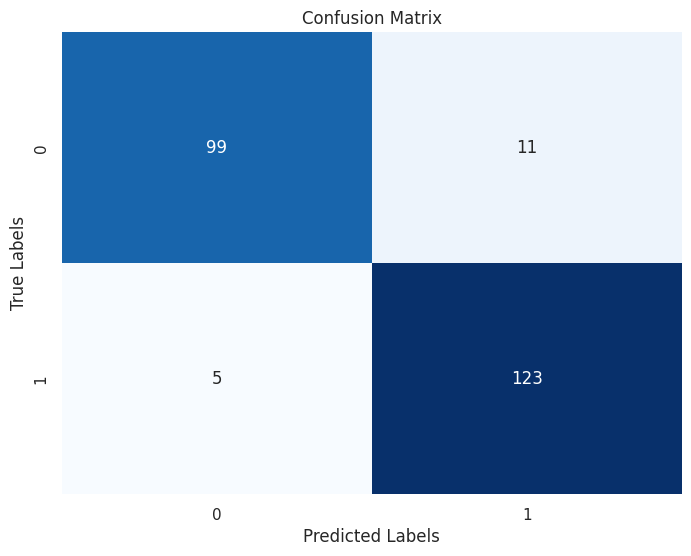

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
voting_classifier.fit(X_train, y_train)
predictions = voting_classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

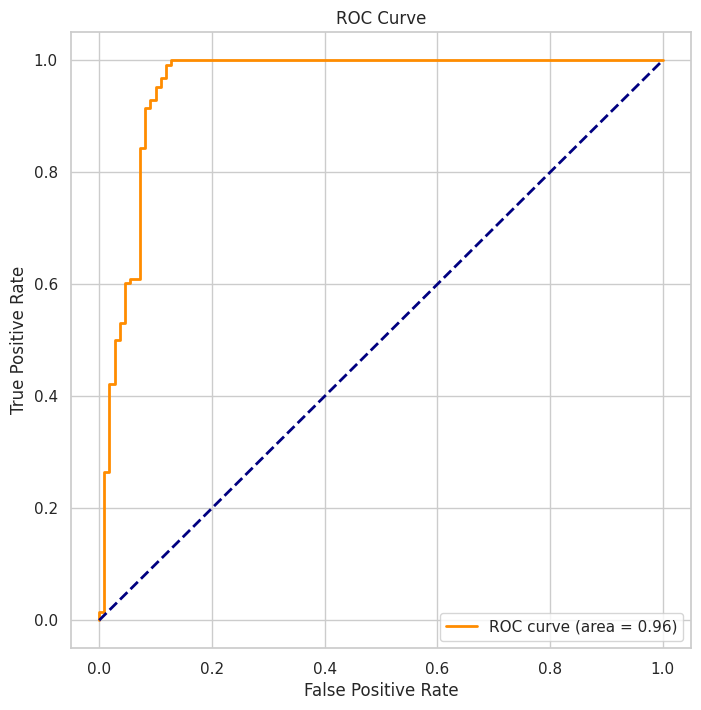

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
voting_classifier.fit(X_train, y_train)
probas = voting_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probas)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

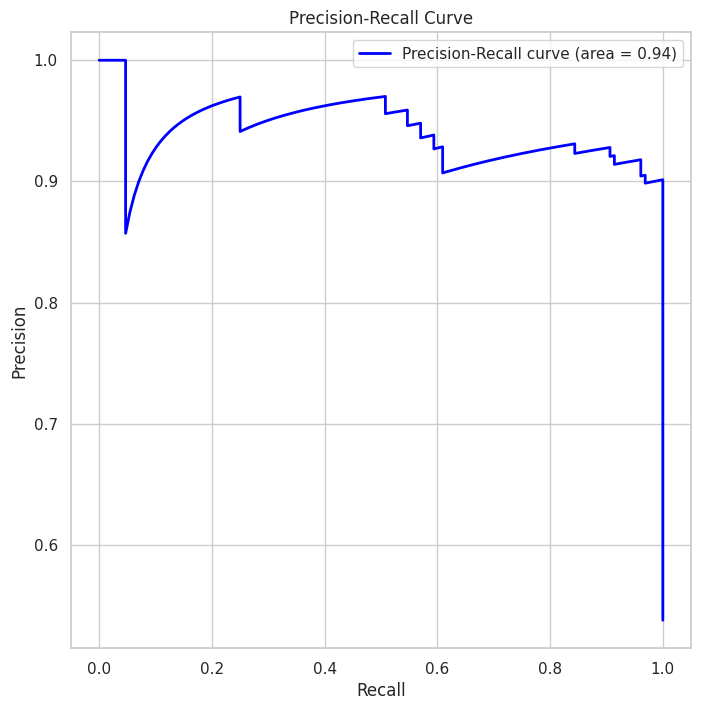

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
voting_classifier.fit(X_train, y_train)
probas = voting_classifier.predict_proba(X_test)[:, 1]
precision, recall, thresholds_pr = precision_recall_curve(y_test, probas)
average_precision = average_precision_score(y_test, probas)

plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = {:.2f})'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

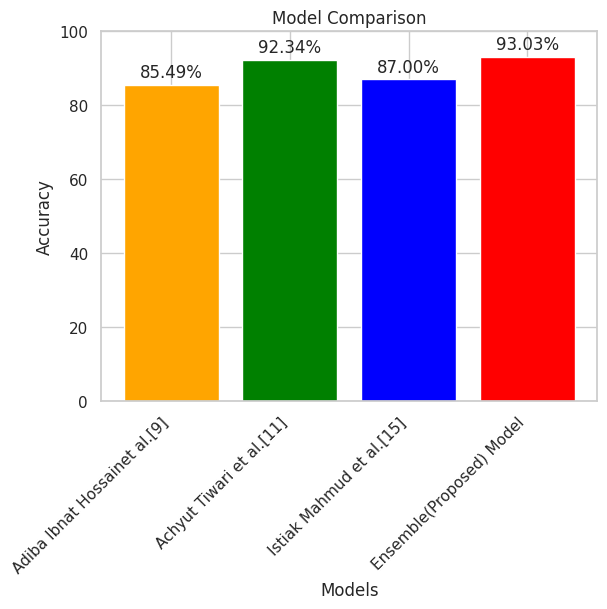

In [61]:
import matplotlib.pyplot as plt

# Replace these values with your actual accuracies
ensemble_model_accuracy = 93.03
model_a_accuracy = 85.49
model_b_accuracy = 92.34
model_c_accuracy = 87.00

models = ['Adiba Ibnat Hossainet al.[9]', 'Achyut Tiwari et al.[11]', 'Istiak Mahmud et al.[15]', 'Ensemble(Proposed) Model']  # Moving Ensemble Model to the last for red color

# Assigning colors: Blue for individual models, Red for Ensemble Model
colors = ['orange', 'green', 'blue', 'red']

accuracies = [model_a_accuracy, model_b_accuracy, model_c_accuracy, ensemble_model_accuracy]

plt.bar(models, accuracies, color=colors)
plt.ylim(0, 100)  # Set the y-axis limit between 0 and 100 for accuracy values
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')

# Adding percentages on top of bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 1, f'{accuracy:.2f}%', ha='center', va='bottom')

# Tilt x-axis labels for better spacing
plt.xticks(rotation=45, ha='right')

plt.show()